# 3D data visualization and potential relationship visualization

Author: Yinghao Li 

This project is to visualize data points in 3D and visualize the potential relationship between dimensions.




#1. Information and Package to use

We will use the matplotlib to plot graph, and numpy to store the data.

Also, we use sklearn to do linear regression analysis.

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating Data

We make a data set with 30 random points, 

Data range:

X coordinates and Y coordinates are beteween 0 and 100

w is between -1 and 1

b is between -50 and 50

Z = **w1 * X+w2 * Y+b+r** where r is a random number between -10 and 10

In [ ]:
w1=random.random()*2-1
w2=random.random()*2-1
b=random.random()*100-50
X=np.random.rand(30,1)*100
Y=np.random.rand(30,1)*100
random_part=np.random.rand(30,1)*20-10
Z=w1*X+w2*Y+random_part+b

data=np.hstack((X,Y,Z))

print(f"the weight w1 = {w1}")
print(f"the weight w2 = {w2}")
print(f"the bias b = {b}")


the weight w1 = 0.5088680906763454
the weight w2 = -0.018649206189010004
the bias b = -29.953803121018353


#Ploting data by scatter points and lines

Plot scatter points in 3D

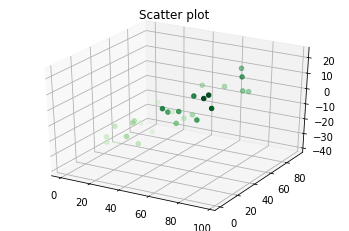

In [ ]:
ax = plt.axes(projection='3d')
ax.set_title("Scatter plot")
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');


Plot line crossing all points

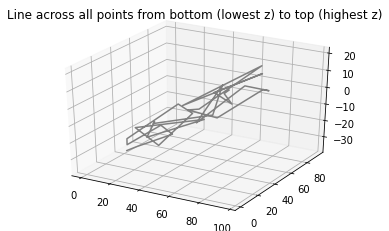

In [ ]:
data_sorted=sorted(data, key=lambda x : x[2] )
data_sorted=np.array(data_sorted)

xline = data_sorted[:,0]
yline = data_sorted[:,1]
zline = data_sorted[:,2]

ax = plt.axes(projection='3d')
ax.set_title("Line across all points from bottom (lowest z) to top (highest z)")

ax.plot3D(xline, yline, zline, 'gray')

# Linear Regresion Analysis

Here we use "LinearRegression" from Sklearn to get the weights and bias and the R^2 score.

The weights analyzed to w1 = 0.5513347933325786，w2 = -0.02270608730756946
The bias analyzed to b = 0.0


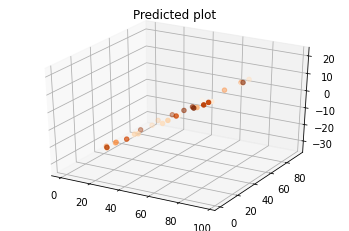

In [ ]:
data = data
ones=np.ones((X.shape[0],1))
XY = np.hstack((X,Y,ones))

LR = LinearRegression()
LR.fit(XY, Z)
Z_pred=LR.predict(XY)

ax = plt.axes(projection='3d')
ax.set_title("Predicted plot")
ax.scatter3D(X, Y, Z_pred, c=zdata, cmap='Oranges');

print(f"The weights analyzed to w1 = {LR.coef_[0,0]}，w2 = {LR.coef_[0,1]}")
print(f"The bias analyzed to b = {LR.coef_[0,2]}")

Show the predicted plane and the original points

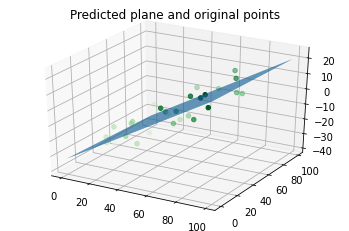

In [ ]:
ax = plt.axes(projection='3d')
ax.set_title("Predicted plane and original points")

ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');

x = y = np.arange(0, 100)
xcord, ycord = np.meshgrid(x, y)
stacked=(np.ravel(xcord).reshape(-1,1), np.ravel(ycord).reshape(-1,1),np.ones((10000,1)))

zcord=LR.predict(np.hstack(stacked))

zcord=zcord.reshape(100,100)
ax.plot_surface(xcord, ycord, zcord)

Calculates the R^2 score

In [ ]:
score=LR.score(XY, Z)
print(f"The R^2 score is {score}")

The R^2 score is 0.8706152128863179


Plot the residue graph

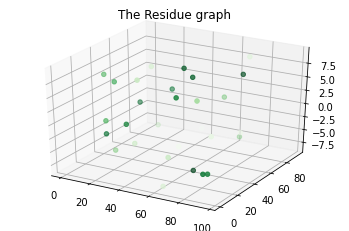

In [ ]:
Z=Z
ones=np.ones((X.shape[0],1))
XY = np.hstack((X,Y,ones))

Z_pred=LR.predict(XY)

ax = plt.axes(projection='3d')
ax.set_title("The Residue graph")
ax.scatter3D(X, Y, Z_pred-Z, c=zdata, cmap='Greens');

# Reference

**sklearn linear_model** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Matplotlib 3D scatterplot** ：https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html